In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot
%matplotlib inline

In [3]:
# Which CSV & TSV files do we have available?

In [2]:
ls -lath ./data/*

-rw-r--r--  1 DAILYSPARK  staff    12M Dec  2 11:09 ./data/imdb.title.principals.csv.gz
-rw-r--r--  1 DAILYSPARK  staff    52K Dec  2 11:09 ./data/bom.movie_gross.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   150K Dec  2 11:09 ./data/tn.movie_budgets.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   487K Dec  2 11:09 ./data/rt.movie_info.tsv.gz
-rw-r--r--  1 DAILYSPARK  staff   3.3M Dec  2 11:09 ./data/imdb.title.basics.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   3.2M Dec  2 11:09 ./data/rt.reviews.tsv.gz
-rw-r--r--  1 DAILYSPARK  staff    17M Dec  2 11:09 ./data/imdb.name.basics.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   527K Dec  2 11:09 ./data/imdb.title.ratings.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   5.3M Dec  2 11:09 ./data/imdb.title.akas.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   808K Dec  2 11:09 ./data/tmdb.movies.csv.gz
-rw-r--r--  1 DAILYSPARK  staff   1.8M Dec  2 11:09 ./data/imdb.title.crew.csv.gz


In [3]:
pwd

'/Users/DAILYSPARK/Code/projects/project1'

In [2]:
# read movie CSV & TSV files. Use latin1 encoding for 'rt.reviews.tsv.gz' to avoid errors
bom_movie_gross_df = pd.read_csv('./data/bom.movie_gross.csv.gz')
tn_budgets_df = pd.read_csv('./data/tn.movie_budgets.csv.gz')
rt_reviews_df = pd.read_csv('./data/rt.reviews.tsv.gz', sep='\t', encoding='latin1')
rt_movie_info_df = pd.read_csv('./data/rt.movie_info.tsv.gz', sep='\t')
imdb_ratings_df = pd.read_csv('./data/imdb.title.ratings.csv.gz')
imdb_crew_df = pd.read_csv('./data/imdb.title.crew.csv.gz')
imdb_title_basics_df = pd.read_csv('./data/imdb.title.basics.csv.gz')
imdb_akas_df = pd.read_csv('./data/imdb.title.akas.csv.gz')
imdb_principals_df = pd.read_csv('./data/imdb.title.principals.csv.gz')
imdb_name_basics_df = pd.read_csv('./data/imdb.name.basics.csv.gz')
tmdb_movies_df = pd.read_csv('./data/tmdb.movies.csv.gz')


In [3]:
# View bom_movie_gross_df sorted by domestic_gross from greatest to least
bom_movie_gross_df.sort_values('domestic_gross', ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


In [9]:
# 3387 records in bom_movie_gross_df. 1350 foreign gross records missing. 5 studio records missing
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
# tn_budgets_df contains similar info to bom_movie_gross_df, but all records are non-null. 5782 rows
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [3]:
# change production_budget, domestic_gross, worldwide_gross from strings to numbers
tn_budgets_df['production_budget'] = tn_budgets_df['production_budget'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
tn_budgets_df['domestic_gross'] = tn_budgets_df['domestic_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)
tn_budgets_df['worldwide_gross'] = tn_budgets_df['worldwide_gross'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)


In [4]:
# convert release_date to datetime object
tn_budgets_df['release_date'] = pd.to_datetime(tn_budgets_df['release_date'])

In [5]:
# limit tn_budgets_df to 2010-2018 like other data sets - 2124 records
tn_budgets_2010_2018_df = tn_budgets_df[tn_budgets_df['release_date'].apply(lambda x: x.year >= 2010 and x.year <= 2018)]

In [7]:
tn_budgets_2010_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 5780
Data columns (total 6 columns):
id                   2124 non-null int64
release_date         2124 non-null datetime64[ns]
movie                2124 non-null object
production_budget    2124 non-null float64
domestic_gross       2124 non-null float64
worldwide_gross      2124 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 116.2+ KB


In [13]:
# All 5782 rows appear to contain complete info
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [7]:
# View tn_budgets_df sorted by worldwide_gross from greatest to least
tn_budgets_df.sort_values('worldwide_gross', ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


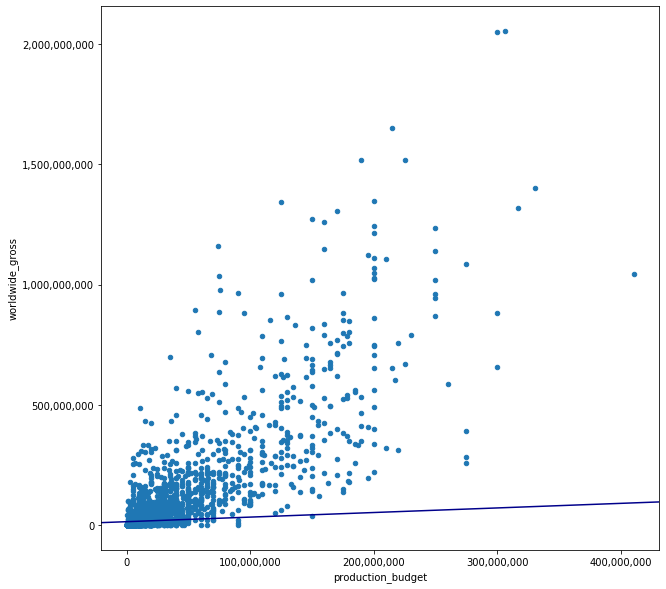

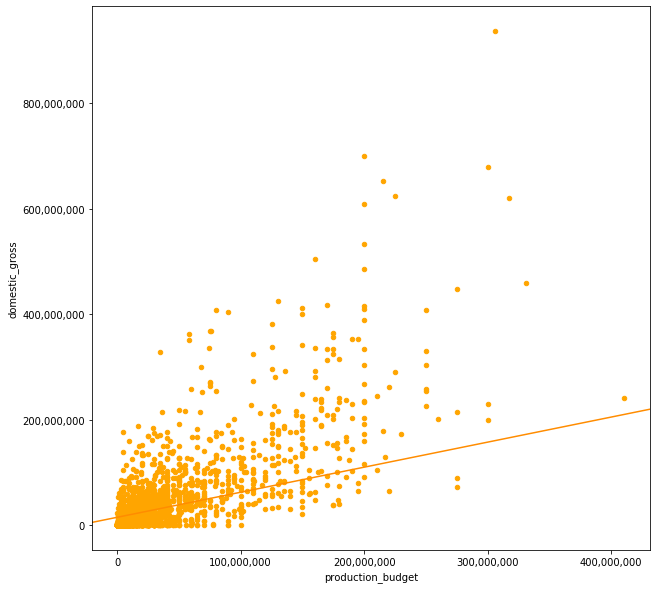

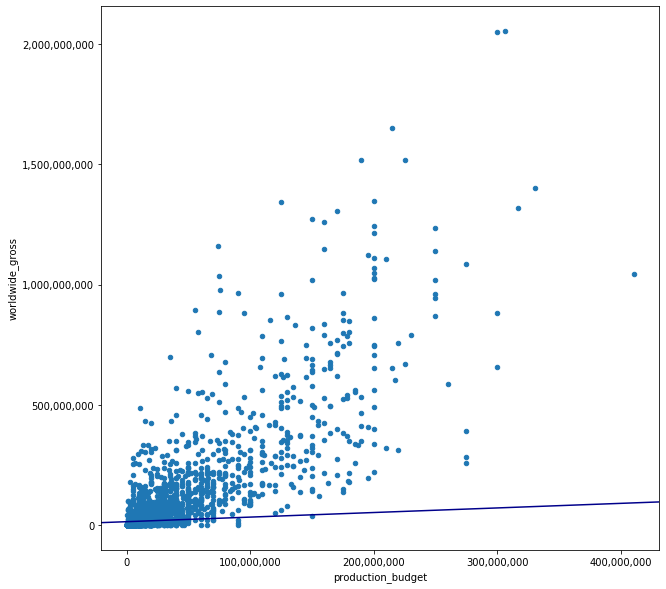

In [6]:
# Scatterplot for production_budget vs domestic_gross 
ax = tn_budgets_2010_2018_df.plot(kind='scatter', x='production_budget', y='domestic_gross', 
                                  color='orange', figsize=(10,10));

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                                                                             
                                                                             
# regress "domestic_gross" onto "production_budget" (plus an intercept)
model = sm.OLS(tn_budgets_2010_2018_df['production_budget'], 
               sm.add_constant(tn_budgets_2010_2018_df['domestic_gross']))

# plot regression line
abline_plot(model_results=model.fit(), ax=ax, color='darkorange')
                                                                             
                                                                             
                                                                             
# Scatterplot for production_budget vs worldwide_gross 
ax = tn_budgets_2010_2018_df.plot(kind='scatter', x='production_budget', 
                                  y='worldwide_gross', figsize=(10,10))
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


# regress "domestic_gross" onto "production_budget" (plus an intercept)
model = sm.OLS(tn_budgets_2010_2018_df['production_budget'], 
               sm.add_constant(tn_budgets_2010_2018_df['worldwide_gross']))

# plot regression line
abline_plot(model_results=model.fit(), ax=ax, color='darkblue')

# Now that we have the regression lines, how can we use them to predict gross revenues?

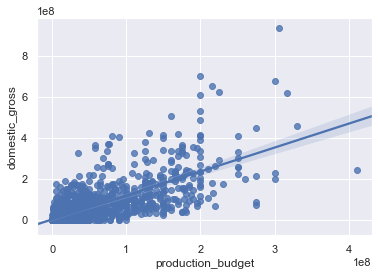

In [7]:
sns.set(color_codes=True)
sns.regplot(x='production_budget', y='domestic_gross', data=tn_budgets_2010_2018_df);

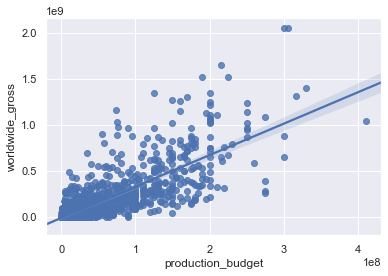

In [8]:
sns.regplot(x='production_budget', y='worldwide_gross', data=tn_budgets_2010_2018_df)

In [9]:
# Join tn_budgets_df to imdb_title_basics_df to gain genre information
joined_df = tn_budgets_2010_2018_df.join(imdb_title_basics_df.set_index('primary_title'), on='movie', how='inner')

In [10]:
joined_df = joined_df.sort_values('worldwide_gross', ascending=False)

In [13]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 6 to 5780
Data columns (total 11 columns):
id                   2535 non-null int64
release_date         2535 non-null datetime64[ns]
movie                2535 non-null object
production_budget    2535 non-null float64
domestic_gross       2535 non-null float64
worldwide_gross      2535 non-null float64
tconst               2535 non-null object
original_title       2535 non-null object
start_year           2535 non-null int64
runtime_minutes      2337 non-null float64
genres               2502 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 237.7+ KB


In [12]:
# Observe most common genres among the highest grossing films
joined_df.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,tt2820852,Furious Seven,2015,137.0,"Action,Crime,Thriller"
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,tt1825683,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,tt4881806,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
155,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,tt1323045,Frozen,2010,93.0,"Adventure,Drama,Sport"
155,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,tt1611845,Wai nei chung ching,2010,92.0,"Fantasy,Romance"
155,56,2013-11-22,Frozen,150000000.0,400738009.0,1.272470e+09,tt2294629,Frozen,2013,102.0,"Adventure,Animation,Comedy"


In [14]:
# Group our joined_df by genres and sum to get an idea of the highest grossing categories
joined_df.groupby('genres').sum()

,id,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes
genres,,,,,,
Action,1227,5.845500e+08,4.088809e+08,1.236312e+09,44306,795.0
"Action,Adventure",82,1.850000e+07,1.177400e+04,1.136600e+07,4024,220.0
"Action,Adventure,Animation",689,1.820000e+09,2.473161e+09,6.793873e+09,30202,1501.0
"Action,Adventure,Biography",120,3.350000e+08,2.835859e+08,9.018259e+08,8063,495.0
"Action,Adventure,Comedy",1173,2.253500e+09,3.191676e+09,8.838180e+09,50373,2710.0
...,...,...,...,...,...,...
Sci-Fi,238,1.583700e+08,4.125634e+08,8.211419e+08,10069,292.0
"Sci-Fi,Thriller",56,2.000000e+04,0.000000e+00,0.000000e+00,2011,78.0
Sport,49,1.900000e+07,5.310554e+06,5.745503e+06,2014,114.0


In [11]:
# Put top 200 worldwide grossing movies from 2010-2018 into their own dataframe
top200_df = joined_df.head(200)
top200_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,tt2820852,Furious Seven,2015,137.0,"Action,Crime,Thriller"
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
243,44,2015-03-27,Home,130000000.0,177397510.0,3.859979e+08,tt2224026,Home,2015,94.0,"Adventure,Animation,Comedy"
243,44,2015-03-27,Home,130000000.0,177397510.0,3.859979e+08,tt2093100,Dom,2011,127.0,Drama
243,44,2015-03-27,Home,130000000.0,177397510.0,3.859979e+08,tt2089701,Home,2011,7.0,"Documentary,Drama,Family"
243,44,2015-03-27,Home,130000000.0,177397510.0,3.859979e+08,tt2075392,Yurt,2011,76.0,Drama


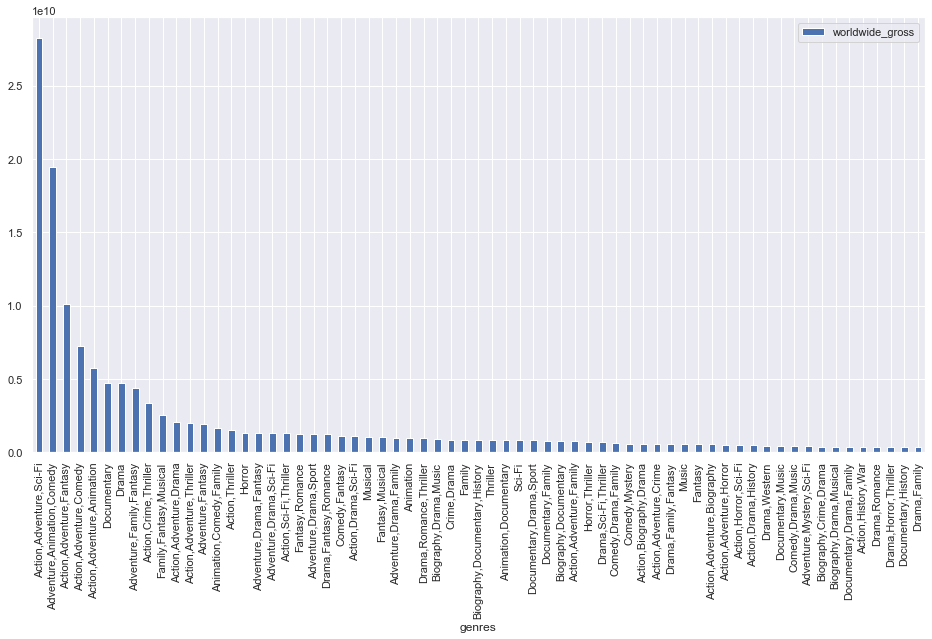

In [12]:
# Show total grossed per genre among the top 200 grossing worldwide from 2010-2018
top200_df.groupby('genres').sum().sort_values(by='worldwide_gross', 
                                             ascending=False).plot(kind='bar', y='worldwide_gross', figsize=(16,8));

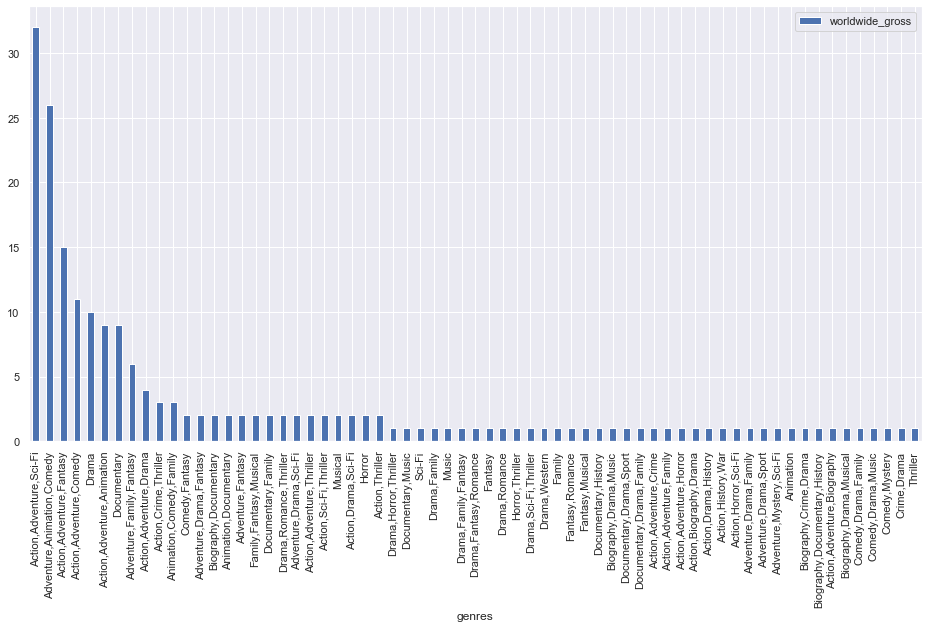

In [13]:
# Show total count per genre among the top 200 grossing worldwide from 2010-2018
top200_df.groupby('genres').count().sort_values(by='worldwide_gross', 
                                             ascending=False).plot(kind='bar', y='worldwide_gross', figsize=(16,8));


In [24]:
ultimate_df = top200_df.join(imdb_principals_df.set_index('tconst'), on='tconst', how='left').join(
                             imdb_name_basics_df.set_index('nconst'), on='nconst', how='left')

In [25]:
ultimate_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,...,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,...,10.0,nm0456158,writer,based on the Marvel comics by,NaN,Jack Kirby,1917.0,1994.0,"writer,animation_department,miscellaneous","tt4154796,tt4154756,tt0371746,tt1825683"
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,...,1.0,nm0000375,actor,NaN,"[""Tony Stark"",""Iron Man""]",Robert Downey Jr.,1965.0,NaN,"actor,producer,soundtrack","tt0848228,tt1300854,tt0988045,tt0371746"
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,...,2.0,nm1165110,actor,NaN,"[""Thor""]",Chris Hemsworth,1983.0,NaN,"actor,soundtrack,producer","tt3501632,tt0800369,tt0848228,tt1735898"
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,...,3.0,nm0749263,actor,NaN,"[""Bruce Banner"",""Hulk""]",Mark Ruffalo,1967.0,NaN,"actor,producer,director","tt1100089,tt1895587,tt0848228,tt0842926"
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,2018,149.0,...,4.0,nm0262635,actor,NaN,"[""Steve Rogers"",""Captain America""]",Chris Evans,1981.0,NaN,"actor,producer,director","tt1843866,tt0848228,tt0458339,tt3498820"


In [26]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 6 to 243
Data columns (total 21 columns):
id                    1795 non-null int64
release_date          1795 non-null datetime64[ns]
movie                 1795 non-null object
production_budget     1795 non-null float64
domestic_gross        1795 non-null float64
worldwide_gross       1795 non-null float64
tconst                1795 non-null object
original_title        1795 non-null object
start_year            1795 non-null int64
runtime_minutes       1760 non-null float64
genres                1783 non-null object
ordering              1793 non-null float64
nconst                1793 non-null object
category              1793 non-null object
job                   706 non-null object
characters            712 non-null object
primary_name          1793 non-null object
birth_year            1225 non-null float64
death_year            101 non-null float64
primary_profession    1771 non-null object
known_for_titles      17

In [29]:
# Filling in the handful of null name values in primary_profession
ultimate_df['primary_profession'] = ultimate_df['primary_profession'].fillna('unknown')

In [30]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1795 entries, 6 to 243
Data columns (total 21 columns):
id                    1795 non-null int64
release_date          1795 non-null datetime64[ns]
movie                 1795 non-null object
production_budget     1795 non-null float64
domestic_gross        1795 non-null float64
worldwide_gross       1795 non-null float64
tconst                1795 non-null object
original_title        1795 non-null object
start_year            1795 non-null int64
runtime_minutes       1760 non-null float64
genres                1783 non-null object
ordering              1793 non-null float64
nconst                1793 non-null object
category              1793 non-null object
job                   706 non-null object
characters            712 non-null object
primary_name          1793 non-null object
birth_year            1225 non-null float64
death_year            101 non-null float64
primary_profession    1795 non-null object
known_for_titles      17

In [43]:
top_actors_df = ultimate_df.loc[ultimate_df['primary_profession'].apply(
    lambda x: 'actor' in x)]['primary_name'].value_counts()

In [40]:
top_directors_df = ultimate_df.loc[ultimate_df['primary_profession'].apply(
    lambda x: 'director' in x)]['primary_name'].value_counts()

In [44]:
top_actors_df.head(50)

Stan Lee                  13
Robert Downey Jr.          8
Dwayne Johnson             7
Chris Hemsworth            6
Chris Evans                5
Christopher Markus         5
Stephen McFeely            5
Andy Serkis                4
Leonardo DiCaprio          4
Johnny Depp                4
Ian McKellen               4
Charles Roven              4
Michael Bay                4
Josh Hutcherson            4
Chris Pratt                4
Rick Jaffa                 4
Hugh Jackman               4
Tom Hiddleston             4
Liam Hemsworth             4
Peter Chernin              4
Pierre Coffin              4
Vin Diesel                 4
Tom Hardy                  4
Cinco Paul                 4
Woody Harrelson            4
Idris Elba                 3
Jason Statham              3
Mark Ruffalo               3
Jack Black                 3
David Heyman               3
Lorenzo di Bonaventura     3
Mark Wahlberg              3
Brian Lynch                3
Samuel L. Jackson          3
Derek Connolly

In [23]:
top_directors_df.head(50)

Scott Rudin           16
Michael Bay           15
Adam McKay            14
Ridley Scott          13
Helen Mirren          13
Luc Besson            12
Chris Evans           12
James Franco          12
Forest Whitaker       12
Nicholas Stoller      12
Evan Goldberg         11
Simon Kinberg         11
Shawn Levy            11
Steven Spielberg      10
Ben Stiller           10
George Clooney        10
Neal H. Moritz        10
Cate Blanchett        10
Jason Bateman         10
Mark Ruffalo          10
Judd Apatow            9
Anthony Katagas        9
Elizabeth Banks        9
Ralph Fiennes          9
James Wan              9
Oren Peli              9
Guillermo del Toro     8
Olivia Wilde           8
Kristen Stewart        8
Tyler Perry            8
Dominic West           8
Christoph Waltz        8
Ron Howard             8
Clint Eastwood         8
Michael B. Jordan      7
Jon Kilik              7
Ben Foster             7
Mia Wasikowska         7
Sean Anders            7
Angelina Jolie         7


In [28]:
# Attempted to sort rt_movie_info_df by box_office, but it's a string value
rt_movie_info_df.sort_values('box_office', ascending=False).head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
1510,1944,"In the 3D action-comedy The Green Hornet, Brit...",PG-13,Action and Adventure|Comedy|Science Fiction an...,Michel Gondry,Evan Goldberg|Seth Rogen,"Jan 14, 2011","May 3, 2011",$,"98,000,000",119 minutes,Sony Pictures
207,274,Natalie Portman stars in this western concerni...,R,Action and Adventure|Drama|Western,NaN,NaN,"Jan 29, 2016","Apr 26, 2016",$,"976,847",97 minutes,NaN
1469,1890,A misplaced sausage and his savory friends emb...,R,Animation|Comedy,Conrad Vernon|Greg Tiernan,Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Gold...,"Aug 12, 2016","Nov 8, 2016",$,"97,661,826",89 minutes,Sony Pictures
1323,1711,"Directed by Garry Marshall, The Princess Diari...",G,Comedy|Kids and Family,Garry Marshall,Shonda Rhimes,"Aug 11, 2004","Dec 14, 2004",$,"95,111,012",113 minutes,NaN


In [29]:
# 1560 rows... a lot of missing values for box_office, studio
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [69]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [71]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [89]:
# Remove unneccesary index column 'Unnamed: 0'
tmdb_movies_df = tmdb_movies_df.drop(columns='Unnamed: 0')

In [91]:
# Perhaps the genre, popularity, vote_average, vote_count columns of tmdb_movies_df may be useful to us
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [90]:
# tmdb_movies_df contains 26517 records. All of them appear to be complete (allegedly)
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [74]:
# imdb_crew_df will be useful for telling us if a certain set of directors/writers will help our cause
imdb_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [83]:
# imdb_titles_df may be useful telling us which genres tend to succeed the most
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [97]:
imdb_title_basics_df['genres'].value_counts().head(25)

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Animation                          828
Drama,Family                       784
Action,Crime,Drama                 727
Comedy,Horror                      724
Crime,Drama                        723
Name: genres, dtype: int6

In [84]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [76]:
# We probably don't need imdb_akas for now
imdb_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [77]:
# imdb_principals_df may be useful for telling us if a certain set of directors/writers will help our cause
imdb_principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [78]:
# imdb_name_basics_df will allow us to pair the rest of our data with actual names
imdb_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
